In [1]:
import os, sys
sys.path.append('/tigress/somalwar/Subhaloes/Subhalos/')
import numpy as np
import units
import constants_noh as constants
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
x = 1.4677992676220736e-21
P = 2.9786839931645153e-05*x
c_arr = [37.5153, -1.5093, 1.636 * 10**(-2), 3.66 * 10**(-4), -2.89237 * 10**(-5), 5.32 * 10**(-7)]
c_arr.reverse()

G = 43007.1 # Gravitational constant in [(km/s)**2*(kpc/(1e10*M_s))]                                 
H0 = 0.07 # Hubble in [(km/s)/kpc]                                                                   
r0 = 8 # Position of the sun in [kpc]                                                                
r_vir = 213.5 # r200 for MW in [kpc] (taken from 1606.04898)                                         
                                                                      
rho_c = 3*H0**2/(8*np.pi*G)*1e10*units.M_s/units.kpc**3

In [13]:
m_test_arr = np.logspace(7, 10, 20)
m_diff_arr = np.diff(m_test_arr)
theta_test_arr = np.linspace(0, np.pi, 20)
theta_diff_arr = np.diff(theta_test_arr)
r_test_arr = np.logspace(0, np.log10(2000), 20)
r_diff_arr = np.diff(r_test_arr)

In [14]:
F_arr = []
l_arr = []
for im, m in enumerate(m_test_arr[:-1]):
    for it, th in enumerate(theta_test_arr[:-1]):
        for ir, r in enumerate(r_test_arr[:-1]):
            d2 = (r0**2 + r**2 - 2*r0*r*np.cos(th))*units.kpc**2
            c = np.polyval(c_arr, np.log(m*units.h))
            r200 = ( 3*m*units.M_s/(4*np.pi*200*rho_c) )**(1./3.)
            r_s = r200/c
            nfw_func = np.log(1+c) - c/(1+c)
            delta_c = 200./3.*c**3/nfw_func
            rho_s = delta_c*rho_c
            l_s = 4*np.pi/3. * rho_s**2 * r_s**3
            F_arr.append( P*(1 - (1+c)**(-3.)) * l_s/d2  / (units.GeV**2/units.Centimeter**5) )
            l_arr.append(np.sqrt(l_s))

In [15]:
N_arr = []
for im, m in enumerate(m_test_arr[:-1]):
    for it, th in enumerate(theta_test_arr[:-1]):
        for ir, r in enumerate(r_test_arr[:-1]):
            P_r = r**2 * np.exp( -2./.678 * ( (r/199)**(.678) - 1 ) ) * r_diff_arr[ir]
            P_m = m**(-1.9) * m_diff_arr[im]
            P_th = np.sin(th) * theta_diff_arr[it]
            N_arr.append(P_r*P_m*P_th)
N_arr = np.array(N_arr)
N_arr = 2218*N_arr/np.sum(N_arr)

In [16]:
np.savez("NF_arr", N_arr=N_arr, F_arr=F_arr, l_arr=l_arr)

In [17]:
N_arr = np.load("NF_arr.npz")["N_arr"]
F_arr = np.load("NF_arr.npz")["F_arr"]

In [18]:
F_plot_arr = np.logspace(-30, -3, 300)
N_plot_arr_xsec = []
xsec_arr = np.logspace(-24,-20,5)*1e22
for ix, xsec in enumerate(xsec_arr):
    N_plot_arr_xsec.append(np.zeros(len(F_plot_arr)-1))
    for iF, F in enumerate(F_arr):
        N_plot_arr_xsec[ix][np.argmin(np.abs(F*xsec-F_plot_arr[:-1]))] += N_arr[iF]

In [19]:
F2 = np.array([1.18691190e-11, 1.63060781e-11, 2.24016781e-11, 3.07759584e-11,
       4.22807440e-11, 5.80862923e-11, 7.98003305e-11, 1.09631593e-10,
       1.50614491e-10, 2.06917772e-10, 2.84268559e-10, 3.90534911e-10,
       5.36526154e-10, 7.37092397e-10, 1.01263507e-09, 1.39118216e-09,
       1.91123916e-09, 2.62570584e-09, 3.60725716e-09, 4.95573572e-09,
       6.80830766e-09, 9.35341508e-09, 1.28499442e-08, 1.76535591e-08,
       2.42528796e-08, 3.33191831e-08, 4.57746866e-08, 6.28863538e-08,
       8.63947692e-08])
F2dNdF = np.array([2.69994973e-14, 5.56388279e-14, 1.25273300e-13, 2.77115709e-13,
       3.52655975e-13, 7.43247364e-13, 1.05134546e-12, 1.67296769e-12,
       2.25553619e-12, 3.39289055e-12, 3.71820960e-12, 5.92250995e-12,
       7.11942446e-12, 8.94247748e-12, 1.01738372e-11, 1.12080196e-11,
       1.66659017e-11, 1.39367032e-11, 1.60694464e-11, 1.69097269e-11,
       2.38762903e-11, 2.03903179e-11, 1.33973802e-11, 1.84056397e-11,
       3.21823164e-11, 1.89483566e-11, 4.33861720e-12, 2.38419822e-11,
       2.45660119e-11])

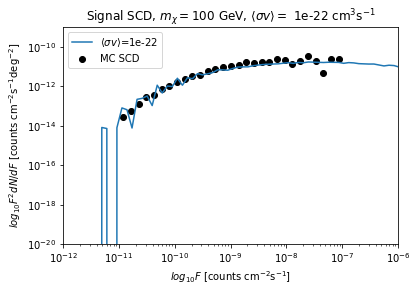

In [20]:
for ix, N_plot_arr in enumerate(N_plot_arr_xsec):
    if xsec_arr[ix] != 1: continue
    dN = N_plot_arr*2.9852067389362934e-05
    dF = np.diff(F_plot_arr)
    F = F_plot_arr[:-1]
    p = plt.plot(F, F**2*dN/dF, label="$\\langle \\sigma v \\rangle$=1e"+str(int(np.log10(xsec_arr[ix]*1e-22))))
    #plt.plot(F, F**2 * 10**(3.75414412)/xsec_arr[ix] * (F/10**(-7.71429)/xsec_arr[ix])**(-1.78730091), c=p[0].get_color(), ls="--")
plt.scatter(F2, F2dNdF, c="black", label="MC SCD")
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-12, 1e-6)
plt.ylim(1e-20, 1e-9)
plt.title("Signal SCD, $m_{\chi} = "+str(100)+"$ GeV, $\\langle \sigma v \\rangle =$ "+str(1e-22)+" cm$^3$s$^{-1}$")
plt.ylabel("$log_{10} F^2dN/dF$ [counts cm$^{-2}$s$^{-1}$deg$^{-2}$]")
plt.xlabel("$log_{10} F$ [counts cm$^{-2}$s$^{-1}$]")
plt.legend()